# Python Machine Learning Project

## This project was created by DataFlair. I am using it purely for educational purposes as a means to practice basic machine learning concepts and python. 
### Link: https://data-flair.training/blogs/python-machine-learning-project-detecting-parkinson-disease/

## Background: Detecting Parkinson’s Disease – Python Machine Learning Project
**What is Parkinson’s Disease?**
Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.

**What is XGBoost?**
XGBoost is a new Machine Learning algorithm designed with speed and performance in mind. XGBoost stands for eXtreme Gradient Boosting and is based on decision trees. In this project, we will import the XGBClassifier from the xgboost library; this is an implementation of the scikit-learn API for XGBoost classification.

**Detecting Parkinson’s Disease with XGBoost – Objective**
To build a model to accurately detect the presence of Parkinson’s disease in an individual.

In [1]:
#Installing necessary libraries
#Will move this to a readme file in the future
!pip install numpy pandas sklearn xgboost

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
#Import necesarry packages

import numpy as np
import pandas as pd
import os,sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.6/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Read in Data

df_data = pd.read_csv('parkinsons.data')
df_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#Get the features and labels from the dataset.

#Features are every column but status
features = df_data.loc[:,df_data.columns !='status'].values[:,1:] #[:,1:] is excluding the 0th column i.e. "name"

In [22]:
#features

In [5]:
#labels are the values of the status column
labels = df_data.loc[:,'status'].values

In [26]:
#labels

In [6]:
#Let's get the count of each label in label (which are 0 and 1)
print(labels[labels ==1].shape[0])
print(labels[labels ==0].shape[0])

147
48


### 147 ones and 48 zeros in the status column

In [7]:
#Scaling the features to bewteen -1 and 1 to normalize them using the MinMaxScaler

scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features) #fit to the data and then transform
y = labels

In [9]:
#Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =7) #test set is 20% of the data


In [44]:
#Hadn't seen this before so wanted to read up on documentation
#help(train_test_split)

In [10]:
#Training the model by initizalizing and XGBClassifer
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
#Calculate the predicted y using the x_test dataset
y_prediction = model.predict(x_test)

#Display the accurary between the predicted y and the y used for testing
print(accuracy_score(y_test,y_prediction)*100)

94.87179487179486


In [14]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 


In [15]:
clf = DecisionTreeClassifier()
modelforplot = clf.fit(x_train, y_train)

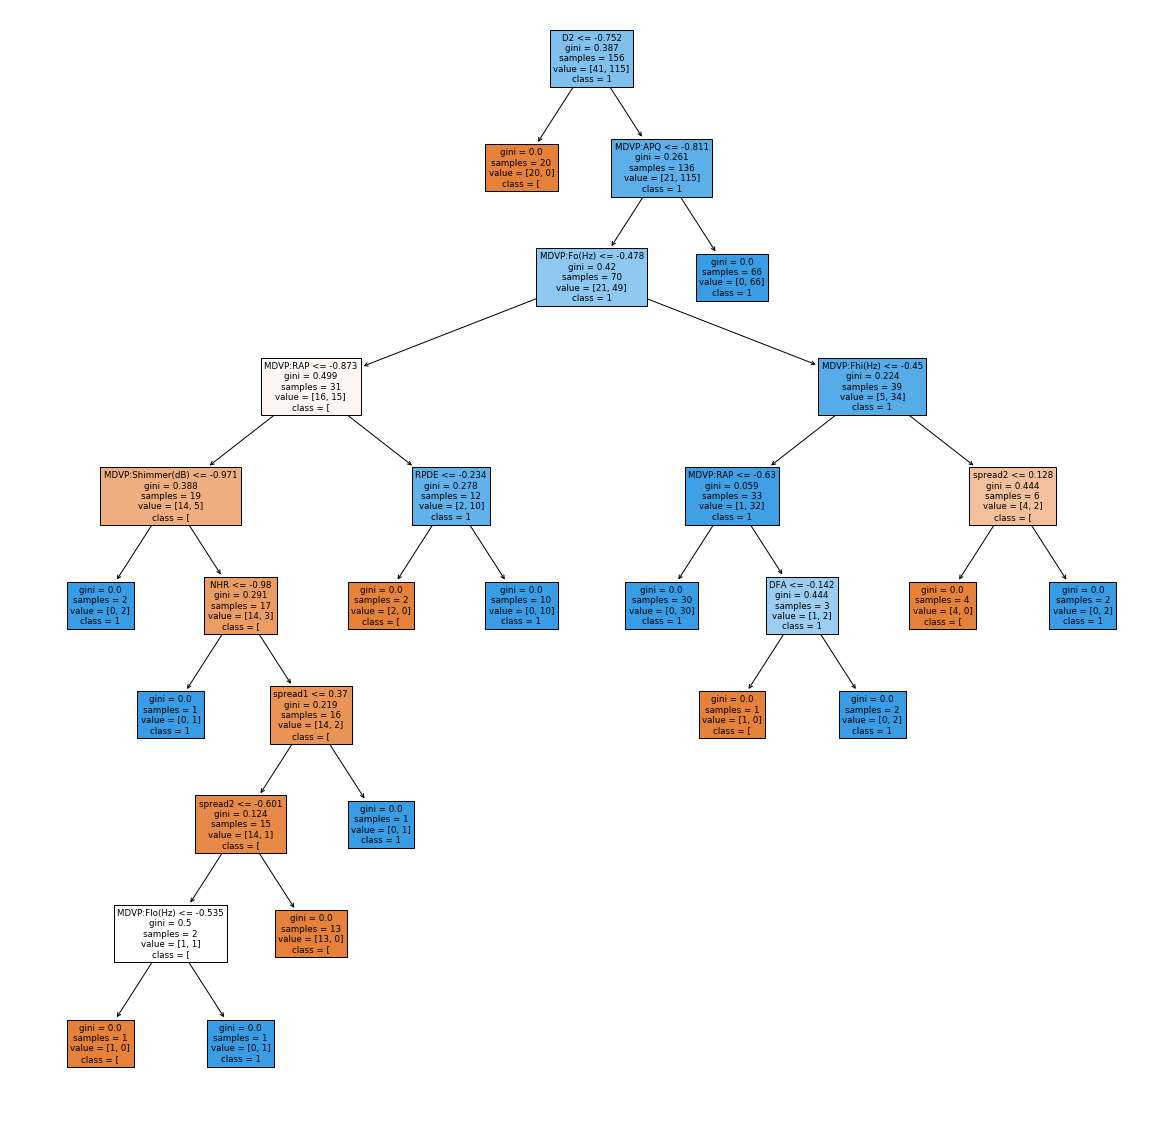

In [25]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf,feature_names = df_data.columns[1:], class_names = str(labels), filled=True)

## Summary

### The sklearn library was used to prepare the dataset to be run thorugh the XGBClassifier. By using the various features provided in the dataset, I could train a model to predict the presence of Parkinson's in a individual with up to ~95% accuracy. It is possible domain knowledge could improve this model. Maybe some features are more relevant to the presence of Parkinson's than others and should be weighed more heavily when training and testing the model.